In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv("MicroCreditLoan_Data file.csv")

In [3]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
print(df.columns)

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')


Obervation:-
    
    1. In above two cells we can the little information of data and numbers(37) of columns present in datafile. 
    
    2. According to this we can see column called "Unnamed: 0" showing the indexing of data, it doesn't seem that much          useful for the project and not including any import information so can drop it.
    

# Data Preparation

In [5]:
# here we are dropoing the column called 'Unnamed: 0' 

df.drop(['Unnamed: 0'], axis=1, inplace =True)

In [6]:
#after droping the column new shape of data
df.shape

(209593, 36)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

Obervation:-
    
    As we can see columns present in types of 'integer', 'float' and very few in 'object' 

In [8]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Obserrvation :-
           
           according to upper cell we don't find any null value in data

In [9]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [10]:
# there are two kind of user present either payer or defulter
# and also data is imbalance, will also resolve that in coming cells

In [11]:
df.drop(['msisdn'], axis=1, inplace =True)

1. we are dropping the column['msisdn']= mobile number of user there is no use of it to analysis of the user

2. but mobile number is an important part of data that identify the customer , will be needing when cx applying for a loan


In [12]:
df.shape

(209593, 35)

In [13]:
df['pcircle'].nunique() 

1

As we can check 'Column['pcircle'] = telecom circle' has only one unique value(means all user from one provider) 

so we can drop it, won't loose any import information


In [14]:
# drop the 'pcircle' column
df.drop(['pcircle'],axis=1, inplace= True)

In [15]:
df.shape

(209593, 34)

In [16]:
# pdate is one of object column , we have to convert it into integer values so model can read it
df['pdate'].nunique()

82

In [17]:
# spliting the column['pdate']=date into three columns 'year', 'month' and 'date'
df[["year", "month", "date"]] = df["pdate"].str.split("-", expand = True)

In [18]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,year,month,date
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,2016,07,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,2016,08,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,2016,08,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,2016,06,06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,2016,06,22


In [19]:

# we can drop the column['pdate'] now because it already spiplited three other columns
# drop the column['pdate']
df.drop(['pdate'],axis=1, inplace= True)

In [20]:
df.shape

(209593, 36)

In [21]:
# converting objects into integer datatype
df[['year','month','date']]=df[['year','month','date']].astype(int)

In [22]:
# checkig the unique value in column['year']
df['year'].nunique()

1

as we see there is only one unique value that means all user data present collected in same year 

so we can drop this column['year']   it won't affect the data for prediction

In [23]:
#droping the column['year']
df.drop(['year'],axis=1, inplace= True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

In [25]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,31.00000


Obesevation:- 


as we can see some the values in "column['aon']= age on cellular network in days" present in negative

usually minimum value shoud be zero.



In [26]:
df_aon=df[df['aon']<0]
df_aon

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date
30,1,-42.0,8.864333,8.864333,780.71,780.71,780195.497093,0.0,773,2,...,6.0,1.0,1.000000,6,6,1.0,0.0,0.0,6,7
197,1,-36.0,32.075333,32.075333,1557.53,1557.53,1.000000,0.0,1539,1,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,13
322,1,-37.0,9.160000,9.160000,203.04,203.04,1.000000,0.0,770,2,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,12
504,1,-36.0,11.470333,11.470333,40.04,40.04,1.000000,0.0,770,1,...,6.0,0.0,3565.786503,6,6,0.0,0.0,0.0,6,13
603,1,-35.0,12.474000,12.474000,1823.08,1823.08,1.000000,0.0,1539,1,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208716,1,-34.0,19.260000,19.260000,714.15,714.15,1.000000,0.0,773,1,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,15
209121,1,-18.0,700.580000,700.600000,1057.72,1090.76,1.000000,0.0,770,1,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,7,1
209240,1,-28.0,10.640000,10.640000,133.35,133.35,1.000000,0.0,770,1,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,21
209421,1,-44.0,7.166667,7.166667,368.55,368.55,1.000000,0.0,773,1,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,5


In [27]:
df_aon.shape

(1539, 35)

In [28]:
#converting column['aon']= age of cellular in days into positive

df['aon']=abs(df['aon'])

In [29]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.808718,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.032666,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.741435,8.43890
min,0.000000,1.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,31.00000


as we can see

-column['daily_decr30']= Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

-column['daily_decr90']= Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

are in negative which is not logicaly possible, conveting them into positive

In [30]:
#convering into positive value
df[['daily_decr30','daily_decr90']]=abs(df[['daily_decr30','daily_decr90']])

In [31]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.808718,5381.431293,6082.544140,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.032666,9220.606472,10918.796572,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.741435,8.43890
min,0.000000,1.000000,0.000000,0.000000,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.453000,42.693333,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,31.00000


In [32]:
# checkig the value count in column['maxamnt_loans30']=maximum amount of loan taken by the user in last 30 days
df['maxamnt_loans30'].value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
59275.166722         1
68599.755670         1
                 ...  
26462.333521         1
53666.885900         1
67319.013426         1
36610.121211         1
28708.879352         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

Obresvation:-
    
        -> As we were know maximum amount of loan taken by the user in last 30 days,
           
           There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively.
            
           but here we see lots of data other than 6, 12 & 0  
           
           other than 6,12 & 0 converting into 0 because there is no other amount to be return other than 6 & 12
                


In [33]:
len(df['maxamnt_loans30'])

209593

In [34]:
#checking the values which have entries other than 6,12,0
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']


118       61907.697372
125       22099.413732
146       98745.934048
369       58925.364061
374       78232.464324
              ...     
209189    50824.996349
209262    17324.994582
209331    92864.501728
209392    54259.265687
209424    96927.243252
Name: maxamnt_loans30, Length: 1047, dtype: float64

Observation:- 
    
    There are 1047 rows other than 6,12 & 0
    
    coveritng them into 0.

In [35]:
#converting other than 6,12 & 0 into 0
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0

In [36]:
# checkig the value count in column['maxamnt_loans30']=maximum amount of loan taken by the user in last 30 days after cnverting
df['maxamnt_loans30'].value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

Observation:-
    
    As we see here 4291 rows are in 0 (maximum amount of loan taken by the user in last 30 days) 
    
    means they have not taken any kind of loan 

In [37]:
# checkig the value count in column['maxamnt_loans90']=maximum amount of loan taken by the user in last 30 days
df['maxamnt_loans90'].value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

In [38]:
df[['maxamnt_loans30','maxamnt_loans90']].value_counts()

maxamnt_loans30  maxamnt_loans90
6.0              6                  178864
12.0             12                  26109
0.0              6                    2081
                 0                    2043
6.0              12                    329
0.0              12                    167
dtype: int64

In [39]:
#checking the values which have entries 0 means they have not taken any kind of loan
df_maxamnt_0=df.loc[(df['maxamnt_loans30']== 0.0) & (df['maxamnt_loans90'] == 0.0)]
df_maxamnt_0[['maxamnt_loans30','maxamnt_loans90','label']]

,maxamnt_loans30,maxamnt_loans90,label
127,0.0,0,1
149,0.0,0,1
187,0.0,0,1
212,0.0,0,1
262,0.0,0,1
...,...,...,...
209337,0.0,0,1
209343,0.0,0,1
209401,0.0,0,1
209406,0.0,0,1


Observation:-
    
    Here we can see there 2043 rows where,
    
        1.maximum amount of loan taken by the user in last 30 days
        
        2.maximum amount of loan taken by the user in last 90 days
        
    both columns values are 0.
    
    means these user have not taken any kind of loan, means they won't be helpfull for the prediction.
    
    droping those rows from the data.

In [40]:
#droping the rows from data where loan values are 0.
df.drop(df.loc[(df['maxamnt_loans30']== 0.0) & (df['maxamnt_loans90'] == 0.0)].index,inplace=True)

In [41]:
df.shape

(207550, 35)

# EXPLORATORY DATA ANALYSIS

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [43]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'month', 'date'],
      dtype='object')

In [44]:
features=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']

In [45]:
list(enumerate(features))

[(0, 'aon'),
 (1, 'daily_decr30'),
 (2, 'daily_decr90'),
 (3, 'rental30'),
 (4, 'rental90'),
 (5, 'last_rech_date_ma'),
 (6, 'last_rech_date_da'),
 (7, 'last_rech_amt_ma'),
 (8, 'cnt_ma_rech30'),
 (9, 'fr_ma_rech30'),
 (10, 'sumamnt_ma_rech30'),
 (11, 'medianamnt_ma_rech30'),
 (12, 'medianmarechprebal30'),
 (13, 'cnt_ma_rech90'),
 (14, 'fr_ma_rech90'),
 (15, 'sumamnt_ma_rech90'),
 (16, 'medianamnt_ma_rech90'),
 (17, 'medianmarechprebal90'),
 (18, 'cnt_da_rech30'),
 (19, 'fr_da_rech30'),
 (20, 'cnt_da_rech90'),
 (21, 'fr_da_rech90'),
 (22, 'cnt_loans30'),
 (23, 'amnt_loans30'),
 (24, 'maxamnt_loans30'),
 (25, 'medianamnt_loans30'),
 (26, 'cnt_loans90'),
 (27, 'amnt_loans90'),
 (28, 'maxamnt_loans90'),
 (29, 'medianamnt_loans90'),
 (30, 'payback30'),
 (31, 'payback90')]

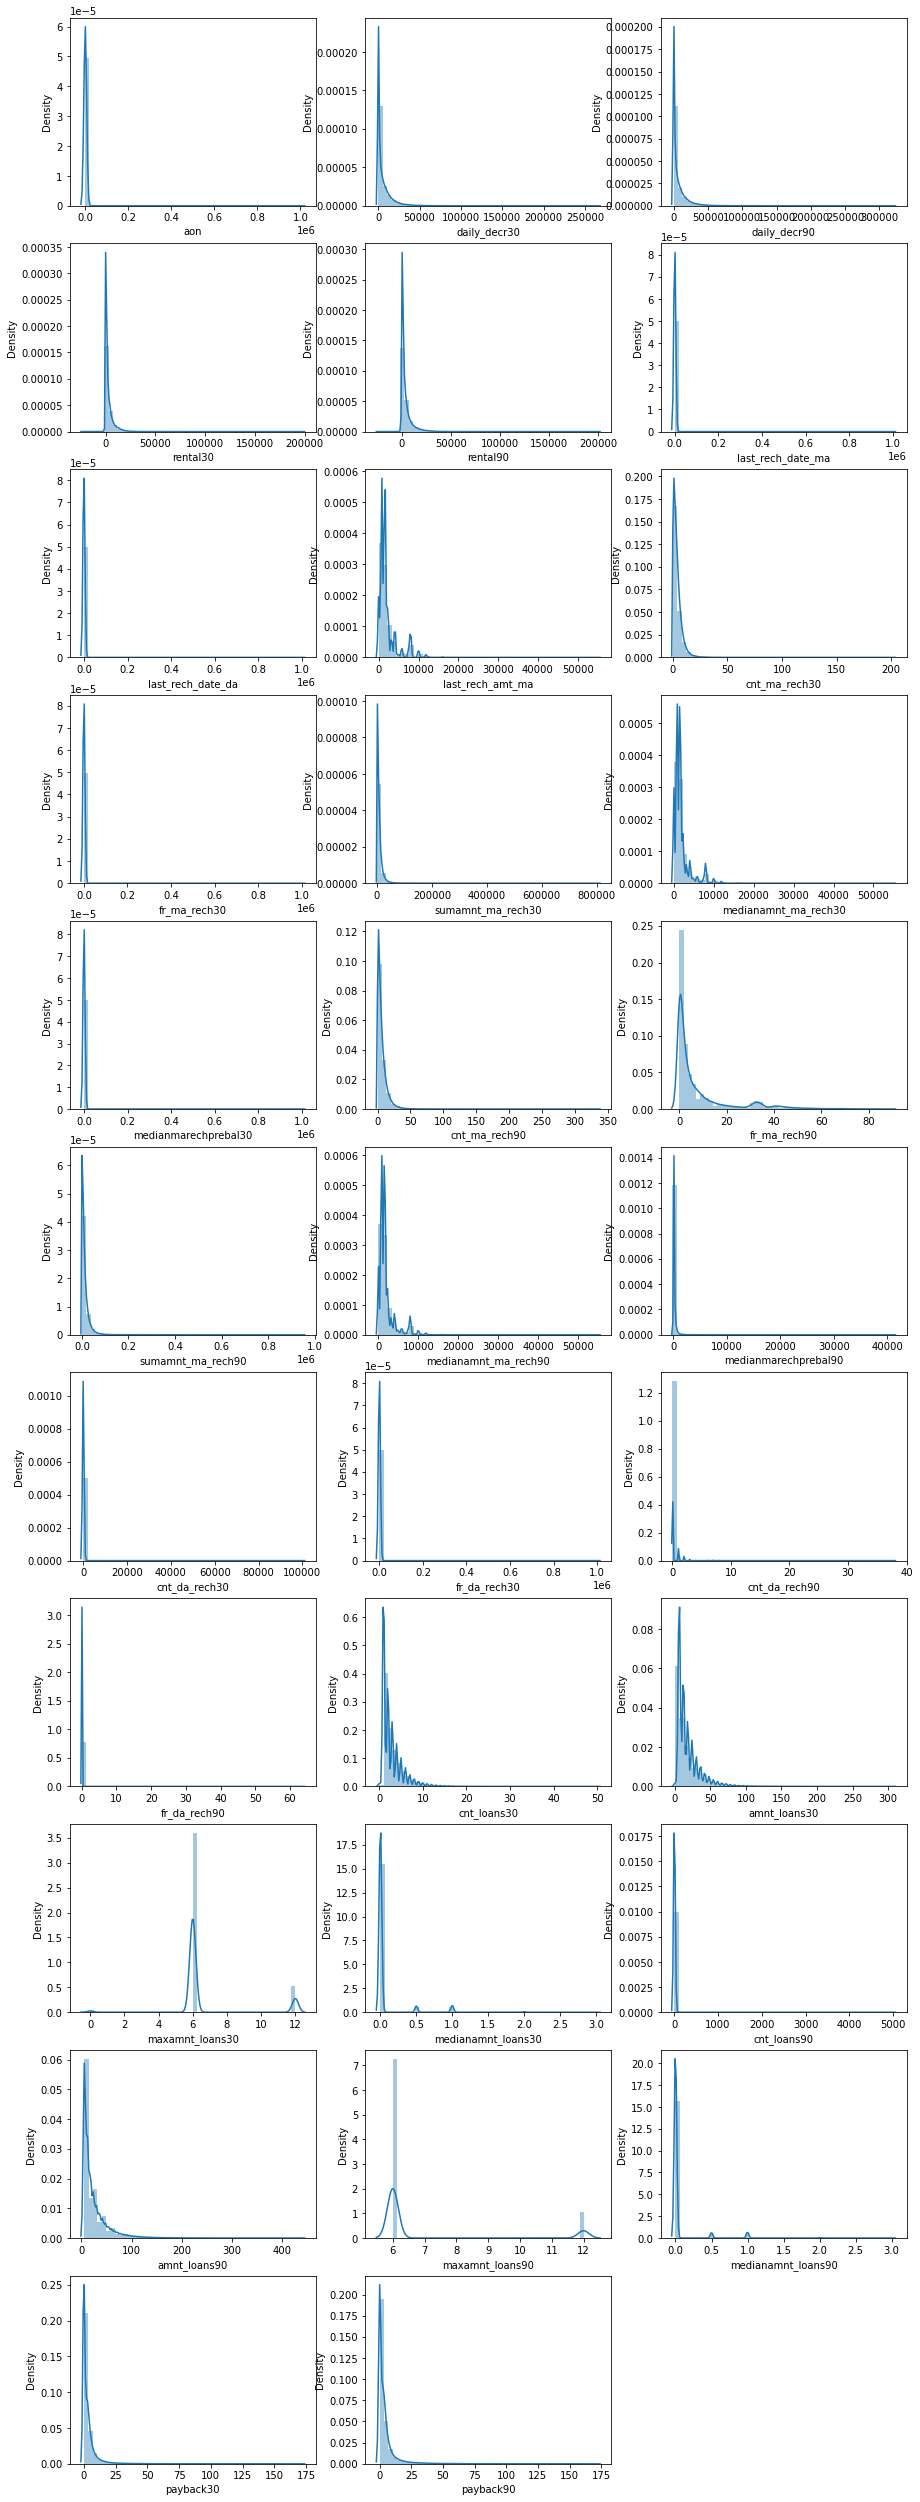

In [46]:
plt.figure(figsize=(15,45))
for i in enumerate(features):
    plt.subplot(11,3,i[0]+1)
    sns.distplot(df[i[1]])

<AxesSubplot:xlabel='fr_da_rech30', ylabel='Density'>

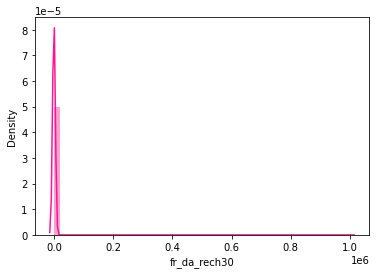

In [47]:
sns.distplot(df['fr_da_rech30'] , color="deeppink",label='FrqncyOfDataAcntRchrgdIn30Days')


<AxesSubplot:xlabel='label', ylabel='count'>

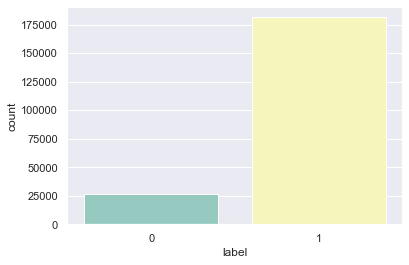

In [48]:
sns.set_theme(style="darkgrid")
sns.countplot(df['label'],palette="Set3")

OBSERVATION:-
    
    We can see here there are less numbers of defaulter and max numbers of payers are present in data
    
    means data is imbalance.

<AxesSubplot:xlabel='label', ylabel='aon'>

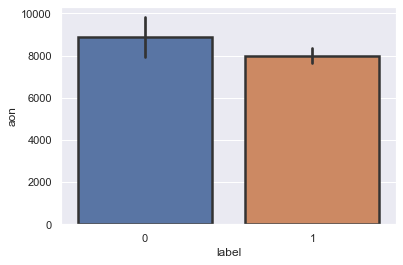

In [49]:
sns.barplot(x='label',y='aon', linewidth=2.5, errcolor=".2", edgecolor=".2", data=df)

,OBSERVATION:-
    
    We can see here defaulter rate is higher where user age on network is max.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

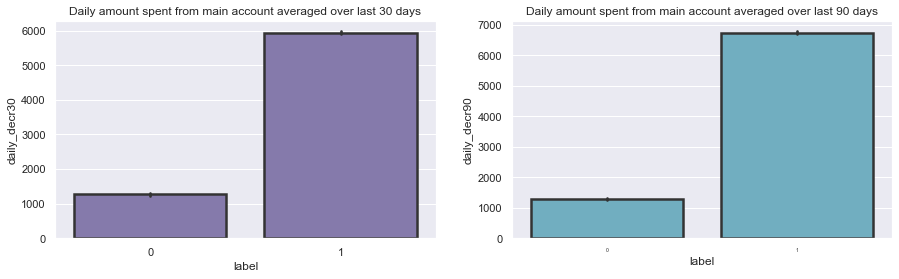

In [50]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.barplot(x=df['label'],y=df['daily_decr30'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="m")
plt.title('Daily amount spent from main account averaged over last 30 days')


plt.subplot(1,2,2)

sns.barplot(x=df['label'],y=df['daily_decr90'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="c")
plt.title('Daily amount spent from main account averaged over last 90 days')

plt.xticks(fontsize='5')


OBSERVATION:-
    
    In repayers, we can see Daily spend average is increasing in last 30 to 90 days

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

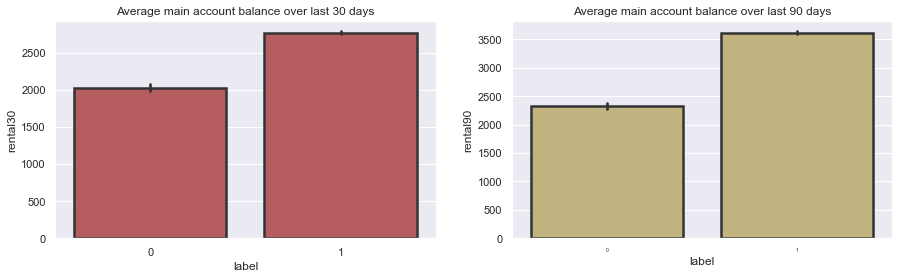

In [51]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.barplot(x=df['label'],y=df['rental30'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="r")
plt.title('Average main account balance over last 30 days')


plt.subplot(1,2,2)

sns.barplot(x=df['label'],y=df['rental90'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="y")
plt.title('Average main account balance over last 90 days')

plt.xticks(fontsize='5')


OBSERVATION:-

   ->there are less difference in average main account balance of payers and defaulters, 
   
     where defaulters count are incresing wherever average main account balance is more in last 30 days.
   
   -> And we check the last 90 days we have more increasing repayars. 

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

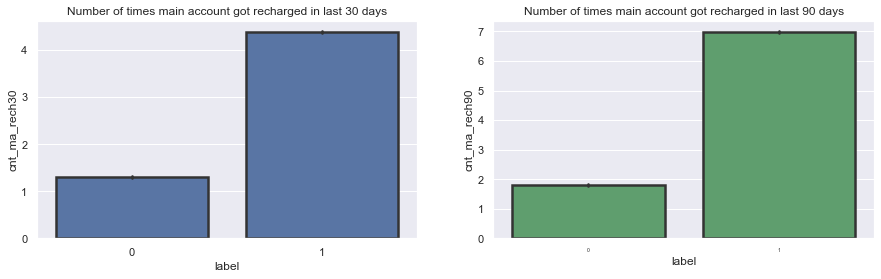

In [52]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.barplot(x=df['label'],y=df['cnt_ma_rech30'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="b")
plt.title('Number of times main account got recharged in last 30 days')


plt.subplot(1,2,2)

sns.barplot(x=df['label'],y=df['cnt_ma_rech90'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="g")
plt.title('Number of times main account got recharged in last 90 days')

plt.xticks(fontsize='5')


OBSERVATION:-
    
    ->In 30 days data we can see here an average less than 1 times default user recharging there main account 
    
      where payers are recharging there main account more than 4 times
      
    -> when we check last In 90 days data defaulters are recharging upto 2 times and payers are reacharging upto 7 times.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

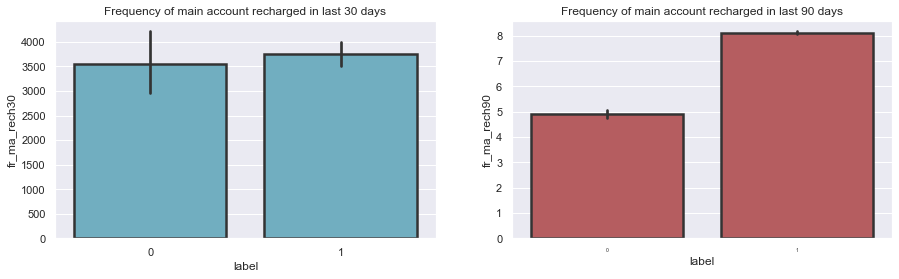

In [53]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.barplot(x=df['label'],y=df['fr_ma_rech30'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="c")
plt.title('Frequency of main account recharged in last 30 days')


plt.subplot(1,2,2)

sns.barplot(x=df['label'],y=df['fr_ma_rech90'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="r")
plt.title('Frequency of main account recharged in last 90 days')

plt.xticks(fontsize='5')



OBSERVATION:-
    
    ->In 30 dyas data the count of defaulters and payers is almost same around 3500
    
      means frequency of recharge won't help too much to predict the user.
      
    ->In last 90 days data frequecy of main account recharged highly increased in payers.  
      
    

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

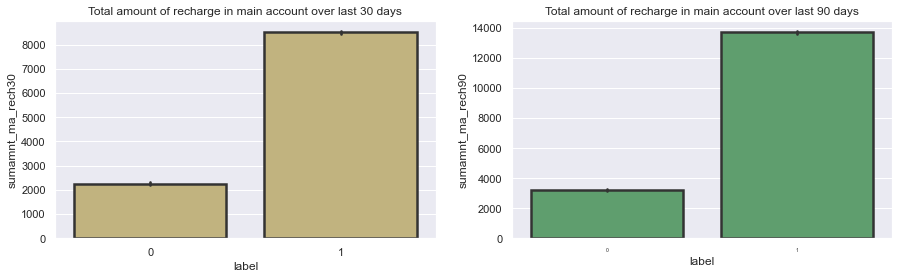

In [54]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.barplot(x=df['label'],y=df['sumamnt_ma_rech30'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="y")
plt.title('Total amount of recharge in main account over last 30 days')


plt.subplot(1,2,2)

sns.barplot(x=df['label'],y=df['sumamnt_ma_rech90'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="g")
plt.title('Total amount of recharge in main account over last 90 days')

plt.xticks(fontsize='5')


OBSERVATION:-

       ->Default users have less amount of recharge in there main account in over 30 days which is 2000 to 2500.
       
         and payers are recharging more than 8000 in last 30 days (in Indonesian Rupiah).
         
         
       ->In last 90 dyas data we can note total amount of recharge in main account arount 3500 of defaulters and payers 
          reaches upto 14000  

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

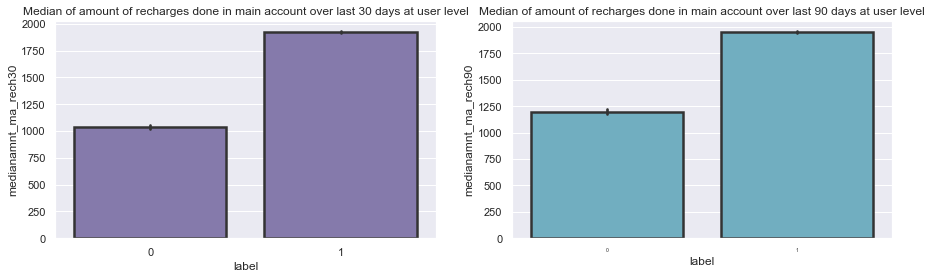

In [55]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.barplot(x=df['label'],y=df['medianamnt_ma_rech30'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="m")
plt.title('Median of amount of recharges done in main account over last 30 days at user level')


plt.subplot(1,2,2)

sns.barplot(x=df['label'],y=df['medianamnt_ma_rech90'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="c")
plt.title('Median of amount of recharges done in main account over last 90 days at user level')

plt.xticks(fontsize='5')


OBSERVATION:-
    
    ->In 30 days data on an average the defaulters has recharged for a max of 1000 indonesian rupaiah and payers upto 2000.
    
    ->In 90 days data we can see defaulter's median of recharge in main account upto 1250 and payers upto 2000.
  

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

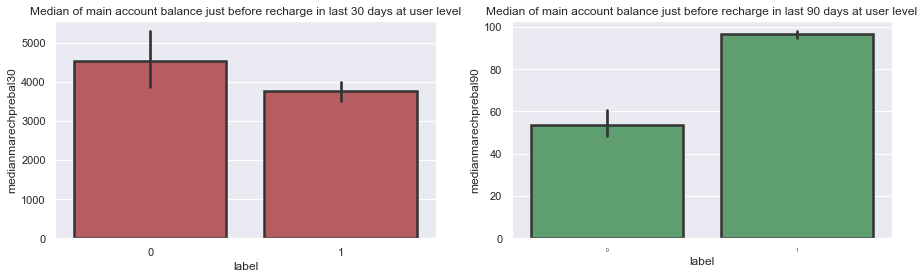

In [56]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.barplot(x=df['label'],y=df['medianmarechprebal30'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="r")
plt.title('Median of main account balance just before recharge in last 30 days at user level')


plt.subplot(1,2,2)

sns.barplot(x=df['label'],y=df['medianmarechprebal90'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="g")
plt.title('Median of main account balance just before recharge in last 90 days at user level')

plt.xticks(fontsize='5')


OBSERVATION:-
    
    ->In 30 days data Median balance main account of defauters are 4000 to 5000.
    
        means incresing Median of main account balance just before recharge in last 30 days at user level, 
    
        increasing the probabililiy to being defaulter.
      
     ->In 90 days data we see when median is average of 10000 for payers that increasing the probabililiy to being payers.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

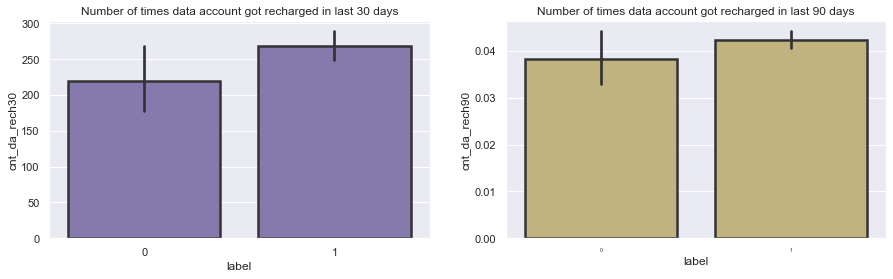

In [57]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.barplot(x=df['label'],y=df['cnt_da_rech30'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="m")
plt.title('Number of times data account got recharged in last 30 days')


plt.subplot(1,2,2)

sns.barplot(x=df['label'],y=df['cnt_da_rech90'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="y")
plt.title('Number of times data account got recharged in last 90 days')

plt.xticks(fontsize='5')


OBSERVATION:-

     ->Here in defaluter bar it shows numbers of times recharge in data account got increased which is 200 to 250
        
        means increasing the numbers of times recharge in data account increase the probabililiy of being defaulter.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

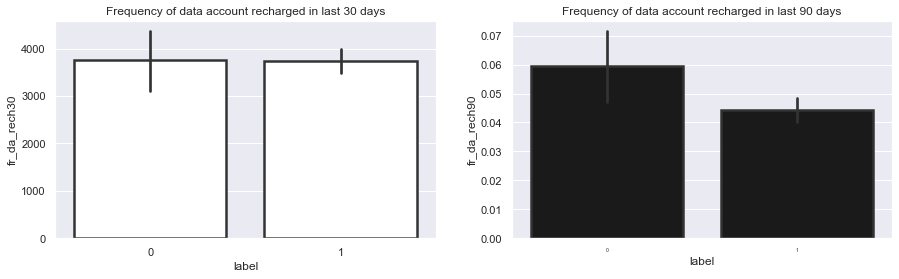

In [58]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.barplot(x=df['label'],y=df['fr_da_rech30'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="w")
plt.title('Frequency of data account recharged in last 30 days')


plt.subplot(1,2,2)

sns.barplot(x=df['label'],y=df['fr_da_rech90'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="k")
plt.title('Frequency of data account recharged in last 90 days')

plt.xticks(fontsize='5')


OBSERVATION:-

        ->In 30 days data defaluter bar shows Frequency of data account recharged in last 30 days got increased which is 3000 to 
        
           4000.means increasing the Frequency of data account recharged in last 30 days 
        
           increase the probabililiy of being defaulter.
        
        -> In 90 days data we also notice increasing the Frequency of data account recharged, 
        
           increase the probabililiy of being defaulter.   

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

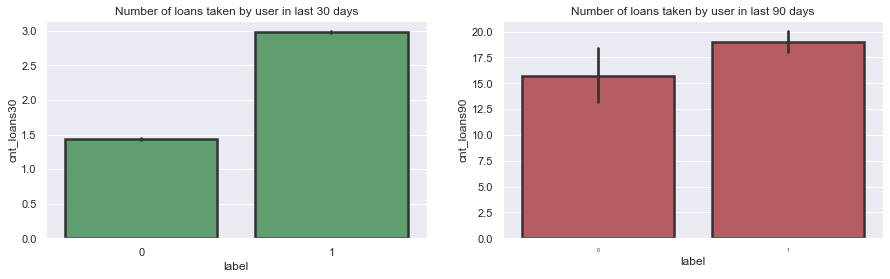

In [59]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.barplot(x=df['label'],y=df['cnt_loans30'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="g")
plt.title('Number of loans taken by user in last 30 days')


plt.subplot(1,2,2)

sns.barplot(x=df['label'],y=df['cnt_loans90'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="r")
plt.title('Number of loans taken by user in last 90 days')

plt.xticks(fontsize='5')


OBSERVATION:-
    
    ->Defaulters has taken between 1 to 1.5 no.of loans. which is around 1 loan only. 
      
      Those who have paid had taken max number of 3 loans in 30 days data.
      
    -> In 90 days data see defaulter's numbers of taken loan highly increasing that also increasing the probability to being            
       defaulter

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

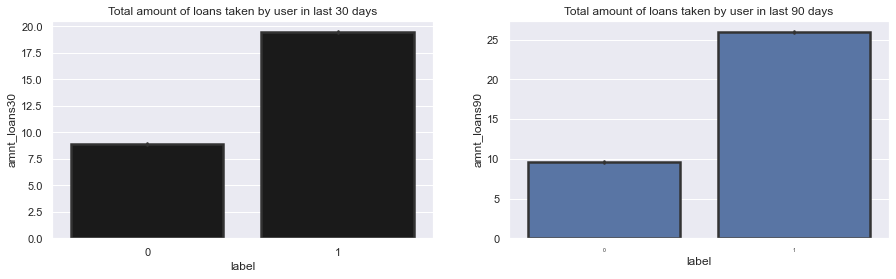

In [60]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.barplot(x=df['label'],y=df['amnt_loans30'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="k")
plt.title('Total amount of loans taken by user in last 30 days')


plt.subplot(1,2,2)

sns.barplot(x=df['label'],y=df['amnt_loans90'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="b")
plt.title('Total amount of loans taken by user in last 90 days')

plt.xticks(fontsize='5')


OBSERVATION:-
    
    ->In last 30 days Total Amount of loans took by Defaulters varies between 7.5 and 10.
    
      Repayers has took 20 Total amount of loans.
      
    -> In last 90 we see defaulters have taken upto 10 and payers took arount 25 Total amount of loans.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

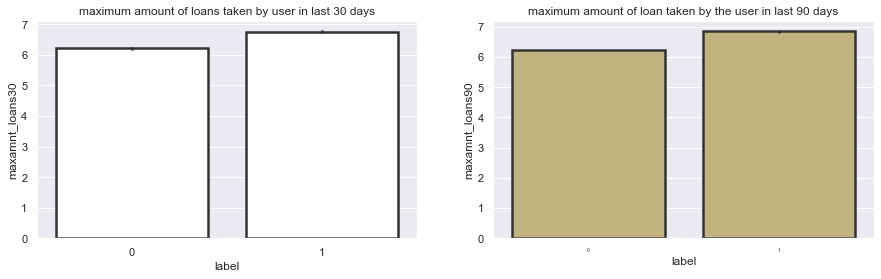

In [61]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.barplot(x=df['label'],y=df['maxamnt_loans30'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="w")
plt.title('maximum amount of loans taken by user in last 30 days')


plt.subplot(1,2,2)

sns.barplot(x=df['label'],y=df['maxamnt_loans90'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="y")
plt.title('maximum amount of loan taken by the user in last 90 days')

plt.xticks(fontsize='5')


OBSERVATION:
    
    A user have taken Maximum  amount of 6 in last 30 or 90 days.
    
    where defaulter and payers both have taken 6-7 amount 
    
    Can say that there not a much difference in loans took by both defaulters and repayers.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

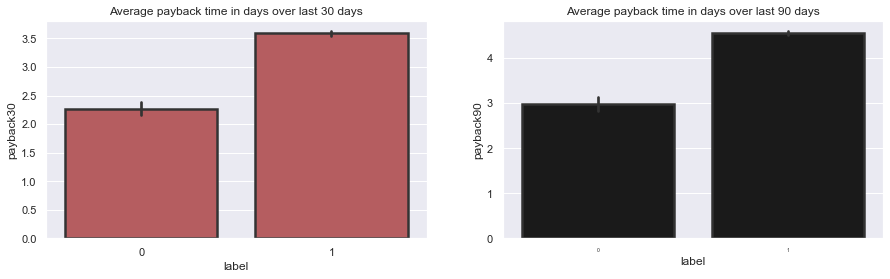

In [62]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.barplot(x=df['label'],y=df['payback30'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="r")
plt.title('Average payback time in days over last 30 days')


plt.subplot(1,2,2)

sns.barplot(x=df['label'],y=df['payback90'],linewidth=2.5, errcolor=".2", edgecolor=".2",color="k")
plt.title('Average payback time in days over last 90 days')

plt.xticks(fontsize='5')


Observation:-
    
    ->In last 30 days payers are returning in average of 3.5 days
    
      where defaulters are returning in 2.0 to 2.5 days.
      
    ->In last 90 days payers are returning in 4-5 days.
      
      and defaulter are returning in 3 days

# EDA CONCLUSION:


 -> We can note that there is less data about defaulters and more about those who did repay their loan. Hence can say that the data is imbalanced.

 -> With increase in Age on Network, defaulting rate is higher.

#### Daily amount spent from main account:-
   
   ->Only in repayers, we can see Daily spend average is increasing in last over 30 to 90 days, on the other side deaulters 
   
      daily spend average is upto 1500 in over 30 or 90 days.


#### Average main account balance :-

   -> In last 30 days there are less difference in average main account balance of payers and defaulters, 
   
     where defaulters count are incresing wherever average main account balance is more.
   
   -> And we check the last 90 days we have more increasing repayars. 


#### Number of times main account got recharged:-

    ->In 30 days data we can see here an average less than 1 times default user recharging there main account 
    
      where payers are recharging there main account more than 4 times
      
    -> when we check last In 90 days data defaulters are recharging upto 2 times and payers are reacharging upto 7 times.


#### Frequency of main account recharged:-

    ->In 30 dyas data the count of defaulters and payers is almost same around 3500
    
      means frequency of recharge won't help too much to predict the user.
      
    ->In last 90 days data frequecy of main account recharged highly increased in payers.  
      
    
#### Total amount of recharge in main account :-

    ->Default users have less amount of recharge in there main account in over 30 days which is 2000 to 2500.
       
         and payers are recharging more than 8000 in last 30 days (in Indonesian Rupiah).
         
         
     ->In last 90 dyas data we can note total amount of recharge in main account arount 3500 of defaulters and payers 
          reaches upto 14000  


#### Median of amount of recharges done in main account :-
    
    ->In 30 days data on an average the defaulters has recharged for a max of 1000 indonesian rupaiah and payers upto 2000.
    
    ->In 90 days data we can see defaulter's median of recharge in main account upto 1250 and payers upto 2000.
  


#### Median of main account balance just before recharge:-
    
    ->In 30 days data Median balance main account of defauters are 4000 to 5000.
    
        means incresing Median of main account balance just before recharge in last 30 days at user level, 
    
        increasing the probabililiy to being defaulter.
      
     ->In 90 days data we see when median is average of 10000 for payers that increasing the probabililiy to being payers.


#### Number of times data account got recharged:-

     ->In 30 days or 90 days data defaluter bar shows numbers of times recharge in data account got increased 
     
        which is 200 to 250 means increasing the numbers of times recharge in data account increase
     
        the probabililiy of being defaulter.
        
        
#### Frequency of data account recharged :-
     
      ->In 30 days data defaluter bar shows Frequency of data account recharged in last 30 days got increased 
      
          which is 3000 to 4000 means increasing the Frequency of data account recharged in last 30 days 
        
           increase the probabililiy of being defaulter.
        
        -> In 90 days data we also notice increasing the Frequency of data account recharged, 
        
           increase the probabililiy of being defaulter.   
 

#### Number of loans taken by user in last 30 days
  
    -> Defaulters has taken between 1 to 1.5 no.of loans. which is around 1 loan only. 
      
        Those who have paid had taken max number of 3 loans in 30 days data.
      
    -> In 90 days data see defaulter's numbers of taken loan highly increasing that also increasing the probability to being            
         defaulter.

#### Total amount of loans taken by user:-
    
    ->In last 30 days Total Amount of loans took by Defaulters varies between 7.5 and 10.
    
      Repayers has took 20 Total amount of loans.
      
    -> In last 90 we see defaulters have taken upto 10 and payers took arount 25 Total amount of loans.
 

#### maximum amount of loan taken by the user:-

   -> A user have taken Maximum  amount of 6 in last 30 or 90 days.
    
      where defaulter and payers both have taken 6-7 amount 
    
      Can say that there not a much difference in loans took by both defaulters and repayers.


#### Average payback time in days:-
    
    ->In last 30 days payers are returning in average of 3.5 days
    
      where defaulters are returning in 2.0 to 2.5 days.
      
    ->In last 90 days payers are returning in 4-5 days.
      
      and defaulter are returning in 3 days

In [63]:
from scipy.stats import skew

# CHECKING FOR OUTLIERS:

In [64]:
features_=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90','month','date']

In [65]:
list(enumerate(features_))

[(0, 'aon'),
 (1, 'daily_decr30'),
 (2, 'daily_decr90'),
 (3, 'rental30'),
 (4, 'rental90'),
 (5, 'last_rech_date_ma'),
 (6, 'last_rech_date_da'),
 (7, 'last_rech_amt_ma'),
 (8, 'cnt_ma_rech30'),
 (9, 'fr_ma_rech30'),
 (10, 'sumamnt_ma_rech30'),
 (11, 'medianamnt_ma_rech30'),
 (12, 'medianmarechprebal30'),
 (13, 'cnt_ma_rech90'),
 (14, 'fr_ma_rech90'),
 (15, 'sumamnt_ma_rech90'),
 (16, 'medianamnt_ma_rech90'),
 (17, 'medianmarechprebal90'),
 (18, 'cnt_da_rech30'),
 (19, 'fr_da_rech30'),
 (20, 'cnt_da_rech90'),
 (21, 'fr_da_rech90'),
 (22, 'cnt_loans30'),
 (23, 'amnt_loans30'),
 (24, 'maxamnt_loans30'),
 (25, 'medianamnt_loans30'),
 (26, 'cnt_loans90'),
 (27, 'amnt_loans90'),
 (28, 'maxamnt_loans90'),
 (29, 'medianamnt_loans90'),
 (30, 'payback30'),
 (31, 'payback90'),
 (32, 'month'),
 (33, 'date')]

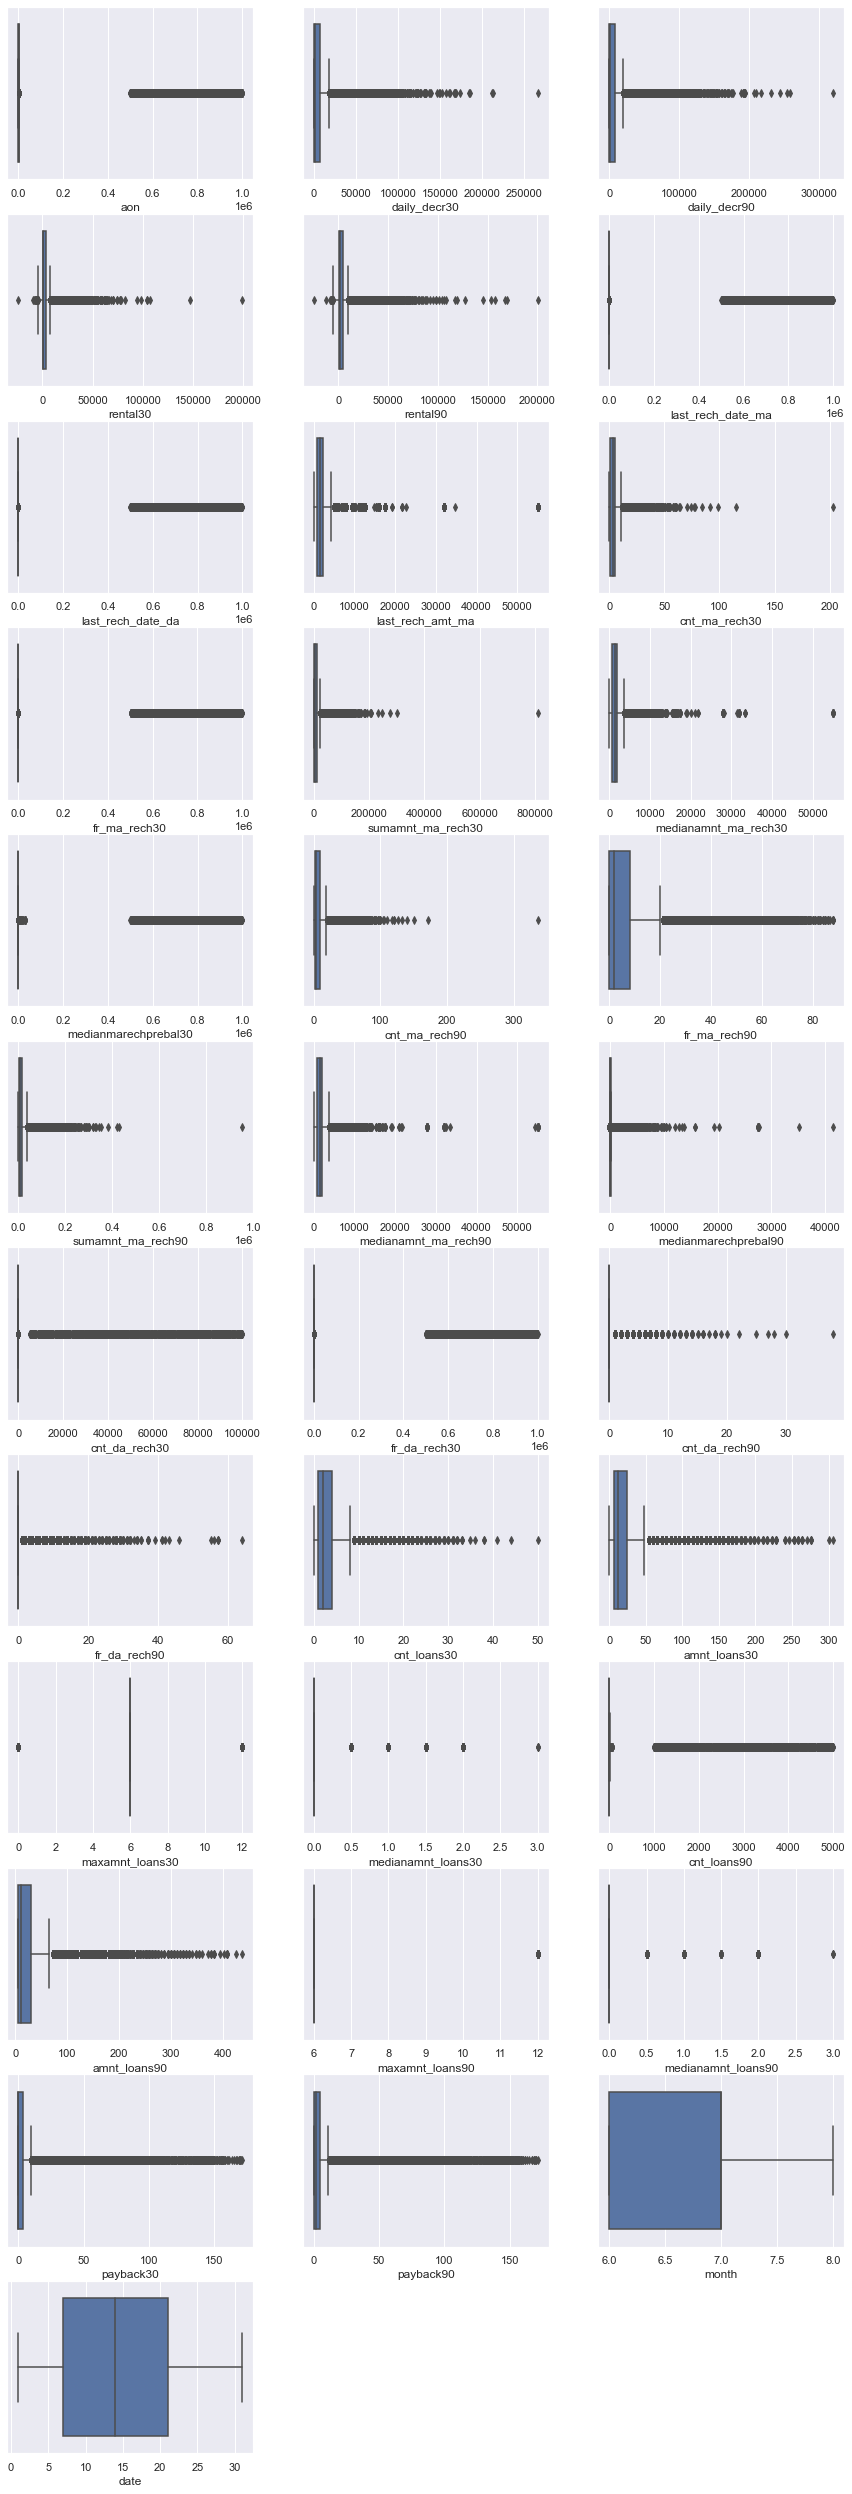

In [66]:
plt.figure(figsize=(15,45))
for o in enumerate(features_):
    plt.subplot(12,3,o[0]+1)
    sns.boxplot(df[o[1]])

OBSERVATION:
    
    We can see here that except Month and date column, outliers are present in almost every column.
    
    

# PLOTTING CORRELATIONS

In [67]:
df_Cor=df.corr()
df_Cor['label']

label                   1.000000
aon                    -0.003900
daily_decr30            0.168263
daily_decr90            0.166017
rental30                0.057273
rental90                0.074566
last_rech_date_ma       0.003674
last_rech_date_da       0.001772
last_rech_amt_ma        0.131744
cnt_ma_rech30           0.239399
fr_ma_rech30            0.001274
sumamnt_ma_rech30       0.204252
medianamnt_ma_rech30    0.142047
medianmarechprebal30   -0.004820
cnt_ma_rech90           0.237831
fr_ma_rech90            0.084565
sumamnt_ma_rech90       0.206712
medianamnt_ma_rech90    0.120616
medianmarechprebal90    0.040006
cnt_da_rech30           0.003832
fr_da_rech30           -0.000075
cnt_da_rech90           0.003253
fr_da_rech90           -0.005243
cnt_loans30             0.201600
amnt_loans30            0.202318
maxamnt_loans30         0.087468
medianamnt_loans30      0.045556
cnt_loans90             0.004902
amnt_loans90            0.204055
maxamnt_loans90         0.101247
medianamnt

<AxesSubplot:>

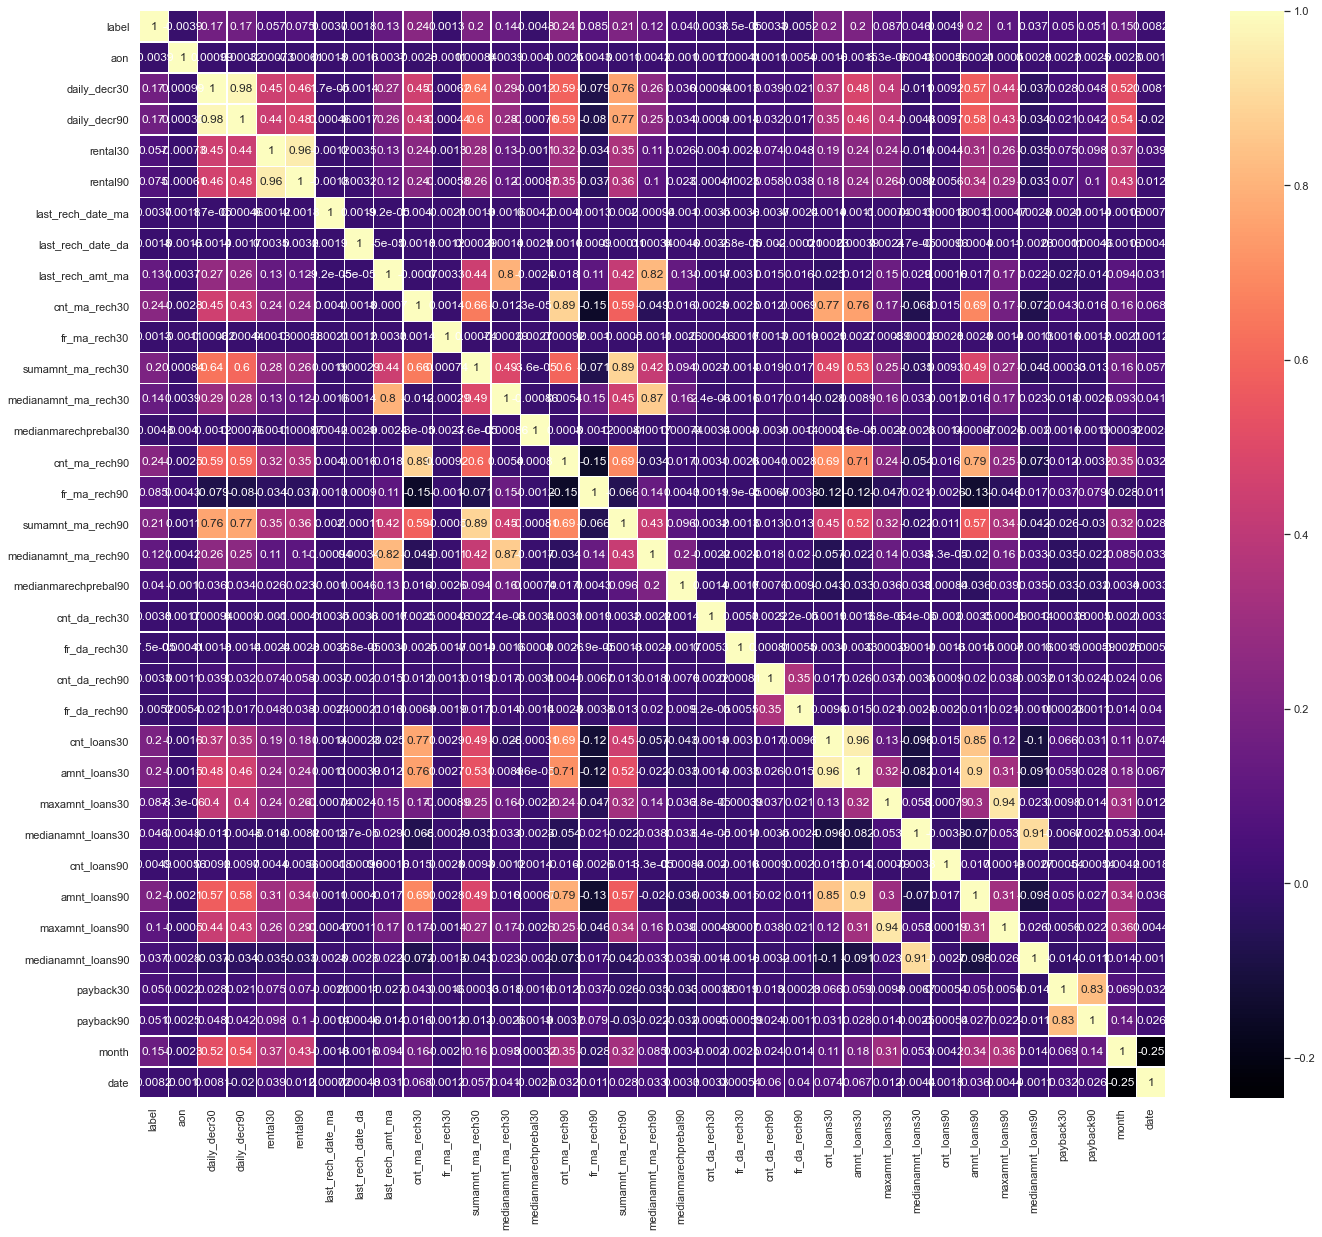

In [68]:
plt.figure(figsize=(23,20))
sns.heatmap(df_Cor,cmap='magma',annot=True,linewidth=.3)

Observation:-
    
    1. As we see 
    
    ->column['cnt_ma_rech30']= Number of times main account got recharged in last 30 days
    
    ->column['cnt_ma_rech90']= Number of times main account got recharged in last 90 days
    
    ->column['sumamnt_ma_rech30 ']=Total amount of recharge in main account over last 30 days (in Indonasian Rupiah)
    
    ->column['sumamnt_ma_rech90 ']=Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
    
    ->column['cnt_loans30  ']=Number of loans taken by user in last 30 days
     
    ->column['cnt_loans90  ']=Number of loans taken by user in last 90 days
     
    ->column['amnt_loans30  ']=Total amount of loans taken by user in last 30 days

    ->column['amnt_loans90  ']=Total amount of loans taken by user in last 90 days

     are highly correlated with repayers and defaulter data.

# OUTLIER REMOVAL:


In [69]:
#zcore

from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([    21,     22,     22, ..., 207543, 207544, 207544], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [70]:
df1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df1.shape)

with outliers:: (207550, 35)
After removing outliers:: (160377, 35)


OBSERVATION:
    
    23% of data removed through zscore.

# IQR

In [71]:
#IQR
from scipy import stats 
IQR = stats.iqr(df) 
IQR 

112.0

In [72]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [73]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(31634, 35)


OBSERVATION:
    
    Huge amounts of data is removed through IQR , hence can say IQR is not recommended for outlier removal

# NOTE:

As it has been mentioned that data removed from outlier treatment should not exceed 7 to 8%,

Zscore causes 23% data loss and IQR causes 85% data loss.

Another technique is replacing the outlier data with mean or median.But when we obserfve this data set there is a huge difference between minimum and maximum values.If we calculate mean or median it wont give appropriate values as it includes the outlier value(maximum ones).So not using this approach.
 
As we are not dropping the outliers, another approach is capping or winsorization of outliers.

using percentile capping. Values that are less than the value at 10th percentile are replaced by 10th percentile value , and values  greater than 90th percentile are replaced by 90th percentile value.

In [74]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'month', 'date'],
      dtype='object')

In [75]:
colmns=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']
for i in colmns:
            FloorQ=df[i].quantile(0.10)
            CeilQ=df[i].quantile(0.90)
            df[i] = np.where(df[i] <FloorQ,FloorQ,df[i])
            df[i] = np.where(df[i] >CeilQ,CeilQ,df[i])
            print(i,"->",df[i].skew())

aon -> 0.5284793206435929
daily_decr30 -> 1.0935464507896255
daily_decr90 -> 1.154323184192897
rental30 -> 1.1230101118579214
rental90 -> 1.1522245420555295
last_rech_date_ma -> 1.0917705123631074
last_rech_date_da -> 0
last_rech_amt_ma -> 0.8359061321231329
cnt_ma_rech30 -> 0.6277453849914029
fr_ma_rech30 -> 1.0070623988221368
sumamnt_ma_rech30 -> 0.7588124242088926
medianamnt_ma_rech30 -> 0.9295986608192282
medianmarechprebal30 -> 1.3584623130969407
cnt_ma_rech90 -> 0.7670588467394291
fr_ma_rech90 -> 1.5893409860791652
sumamnt_ma_rech90 -> 0.8543081510966238
medianamnt_ma_rech90 -> 0.9684104269012621
medianmarechprebal90 -> 1.258477107838736
cnt_da_rech30 -> 0
fr_da_rech30 -> 0
cnt_da_rech90 -> 0
fr_da_rech90 -> 0
cnt_loans30 -> 0.8910588387118499
amnt_loans30 -> 0.7816448336192705
maxamnt_loans30 -> 2.2568424305116785
medianamnt_loans30 -> 0
cnt_loans90 -> 1.017641178749645
amnt_loans90 -> 0.9564054554835316
maxamnt_loans90 -> 2.224470801656892
medianamnt_loans90 -> 0
payback30 -> 0

In [76]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date
count,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.0,207550.000000,207550.000000,...,207550.000000,207550.0,207550.000000,207550.000000,207550.000000,207550.0,207550.000000,207550.000000,207550.000000,207550.000000
mean,0.873948,637.677639,4224.634416,4664.161700,2136.382527,2706.809787,4.756883,0.0,1660.528861,3.537909,...,6.754777,0.0,3.331279,20.643180,6.769116,0.0,2.199570,2.804969,6.787560,14.429159
std,0.331908,433.902329,5369.963146,6076.146754,2387.043913,3090.031999,4.751353,0.0,1231.349189,2.876785,...,1.989722,0.0,2.672582,16.275252,2.005785,0.0,2.768133,3.382969,0.737225,8.421331
min,0.000000,132.000000,8.699833,8.800000,43.350000,48.000000,0.000000,0.0,0.000000,0.000000,...,6.000000,0.0,1.000000,6.000000,6.000000,0.0,0.000000,0.000000,6.000000,1.000000
25%,1.000000,246.000000,41.760000,41.983500,278.130000,299.830000,1.000000,0.0,770.000000,1.000000,...,6.000000,0.0,1.000000,6.000000,6.000000,0.0,0.000000,0.000000,6.000000,7.000000
50%,1.000000,527.000000,1414.400000,1443.355000,1074.880000,1318.480000,3.000000,0.0,1539.000000,3.000000,...,6.000000,0.0,2.000000,12.000000,6.000000,0.0,0.000000,1.714286,7.000000,14.000000
75%,1.000000,982.000000,7200.000000,7723.997500,3330.570000,4163.570000,7.000000,0.0,2309.000000,5.000000,...,6.000000,0.0,5.000000,30.000000,6.000000,0.0,3.800000,4.500000,7.000000,21.000000
max,1.000000,1410.000000,15564.200000,17720.215000,7276.893000,9422.045000,15.000000,0.0,4067.000000,9.000000,...,12.000000,0.0,9.000000,54.000000,12.000000,0.0,8.000000,10.000000,8.000000,31.000000


# Dividing data into X and Y

In [77]:

x=df.drop(['label'],axis=1)
y=df['label']


## Skewness handling

In [78]:
x.shape

(207550, 34)

In [79]:
y.shape

(207550,)

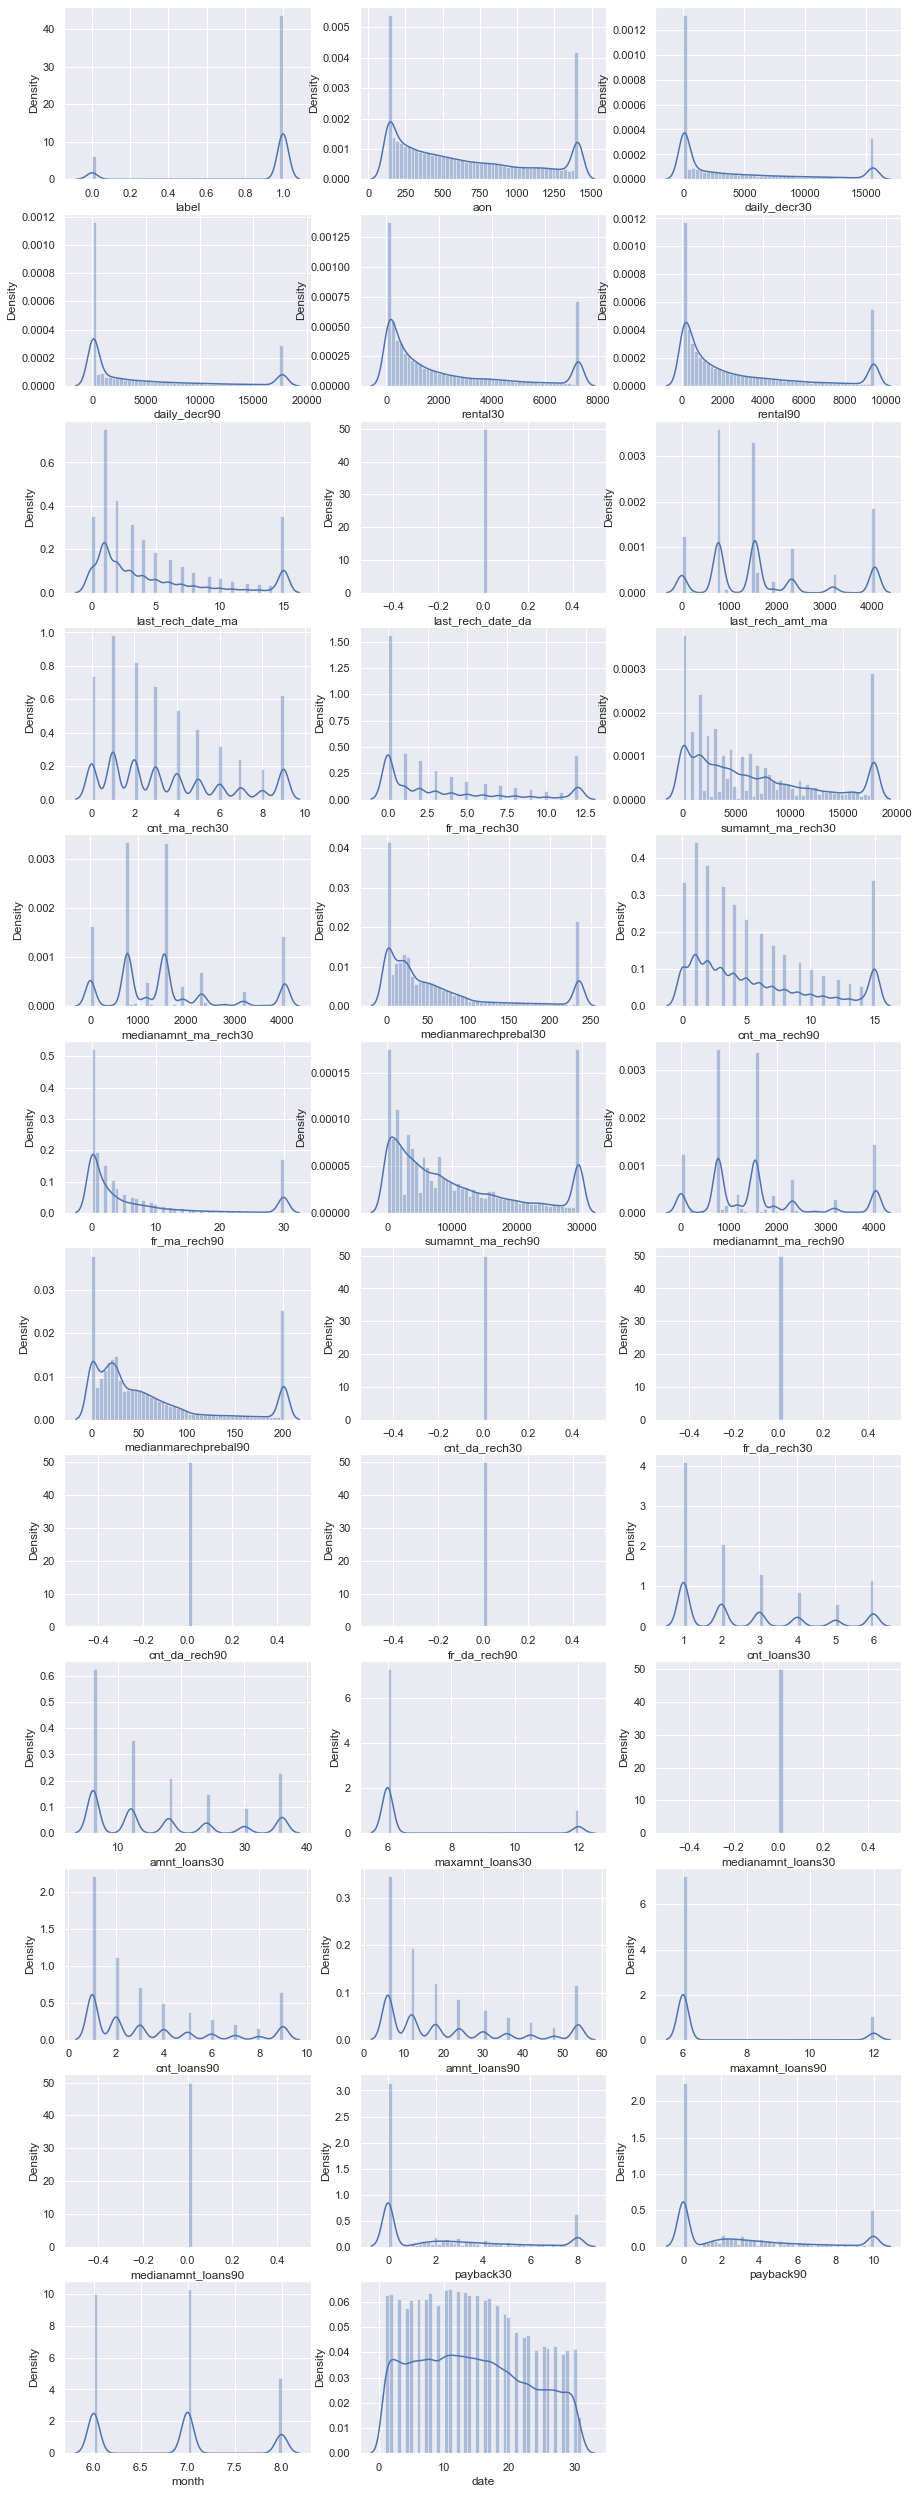

In [80]:
plt.figure(figsize=(15,45))
for i in enumerate(df.columns):
    plt.subplot(12,3,i[0]+1)
    sns.distplot(df[i[1]])
    

In [81]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

In [82]:
pd.DataFrame(x).skew()

0    -0.070546
1    -0.133140
2    -0.123397
3    -0.098632
4    -0.100638
5     0.011534
6     0.000000
7    -0.391191
8    -0.060180
9     0.100370
10   -0.514360
11   -0.495092
12   -0.124100
13   -0.056368
14    0.125762
15   -0.410304
16   -0.369080
17   -0.120932
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.178440
23    0.091937
24    2.256842
25    0.000000
26    0.160614
27    0.086985
28    2.224471
29    0.000000
30    0.225385
31    0.129191
32    0.080518
33   -0.160253
dtype: float64

In [83]:
#scaling X vlues
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)

# Imbalanced learn

In [84]:
from imblearn.under_sampling import RandomUnderSampler

UnderSample = RandomUnderSampler(sampling_strategy='majority')
x_rus, y_rus = UnderSample.fit_resample(x, y)

print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (207550,)
Resample Target dataset shape (52324,)


In [85]:
x_rus.shape

(52324, 34)

In [86]:
y_rus.shape

(52324,)

Observation:-

We can note that before performing Random under sampling, the data is unevenly distributed.

there are 181388 records of repayers and 26162 record of defaulters.If we feed this data into the model, 
it may give biased prediction.

So,performed undersampling.After performing undersampling we can note that equal no.of records are fetched for both defauters and repayers.

# Spliting Train and Test data

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.23,random_state=42)

In [89]:
x_train.shape

(40289, 34)

In [90]:
x_test.shape

(12035, 34)

In [91]:
y_train.shape

(40289,)

In [92]:
y_test.shape

(12035,)

 # MODEL BUILDING:

In [93]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

# USING UNDER SAMPLING

## LOGISTIC REGRESSION

In [94]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(logreg_score))


cross validation score for svm: 0.7720165934650378


In [95]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7705027004570004
[[4737 1283]
 [1479 4536]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      6020
           1       0.78      0.75      0.77      6015

    accuracy                           0.77     12035
   macro avg       0.77      0.77      0.77     12035
weighted avg       0.77      0.77      0.77     12035

Training accuracy:: 0.7719973193675693
Test accuracy:: 0.7705027004570004


# DECISION TREE CLASSIFIER

In [96]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))


cross validation score for svm: 0.7810183226891445


In [97]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7819692563356876
[[4730 1290]
 [1334 4681]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      6020
           1       0.78      0.78      0.78      6015

    accuracy                           0.78     12035
   macro avg       0.78      0.78      0.78     12035
weighted avg       0.78      0.78      0.78     12035

Training accuracy:: 0.9987837871379285
Test accuracy:: 0.7819692563356876


# KNeighborsClassifier

In [98]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))


cross validation score for knn: 0.7869810994417097


In [99]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.7875363523057748
[[4909 1111]
 [1446 4569]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      6020
           1       0.80      0.76      0.78      6015

    accuracy                           0.79     12035
   macro avg       0.79      0.79      0.79     12035
weighted avg       0.79      0.79      0.79     12035

Training accuracy:: 0.8479237508997494
Test accuracy:: 0.7875363523057748


# RandomForestClassifier

In [100]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))


cross validation score for rfc: 0.840340920879413


In [101]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.838637307852098
[[5046  974]
 [ 968 5047]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      6020
           1       0.84      0.84      0.84      6015

    accuracy                           0.84     12035
   macro avg       0.84      0.84      0.84     12035
weighted avg       0.84      0.84      0.84     12035

Training accuracy:: 0.9987589664672739
Test accuracy:: 0.838637307852098


# ENSEMBLE TECHNIQUES

## 1.ADA BOOST CLASSIFIER

In [102]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))


cross validation score for Ada boost: 0.8147120777283192


In [103]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))


0.8176152887411716
[[5057  963]
 [1232 4783]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      6020
           1       0.83      0.80      0.81      6015

    accuracy                           0.82     12035
   macro avg       0.82      0.82      0.82     12035
weighted avg       0.82      0.82      0.82     12035

Training accuracy:: 0.8157313410608354
Test accuracy:: 0.8176152887411716


## 2.BAGGING CLASSIFIER


In [104]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))


cross validation score for BAGGING Classifier: 0.8288546033142998


In [105]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))


0.8314083921894474
[[5232  788]
 [1241 4774]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      6020
           1       0.86      0.79      0.82      6015

    accuracy                           0.83     12035
   macro avg       0.83      0.83      0.83     12035
weighted avg       0.83      0.83      0.83     12035

Training accuracy:: 0.9867457618704858
Test accuracy:: 0.8314083921894474


## 3.Gradient Boosting classifier


In [106]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.8391749993133437


In [107]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))


0.8418778562525966
[[5174  846]
 [1057 4958]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      6020
           1       0.85      0.82      0.84      6015

    accuracy                           0.84     12035
   macro avg       0.84      0.84      0.84     12035
weighted avg       0.84      0.84      0.84     12035

Training accuracy:: 0.8415448385415374
Test accuracy:: 0.8418778562525966


#### OBSERVATION:
    
    Choosing :
          1.Adaboost classifier
             
             and 
          
          2.Gradient Boosting classifier 
         
             for HYPER PARAMETER TUNING because there both train and test accuracies are same.
        
             Rest of the models having huge difference between train and test accuracies so not considering them.

# HYPER PARAMETER TUNING:

## Using Adaboost classifier

In [111]:
param_grid={
    'n_estimators':[100,200],
    'learning_rate':[0.001,0.01,0.1,0.2,0.5],
    'algorithm':['SAMME', 'SAMME.R']
}

In [112]:
adb_grid=GridSearchCV(AdaBoostClassifier(),param_grid,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [113]:
adb_grid.fit(x_train,y_train)
adb_pred=adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,adb_pred))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Accuracy after parameter tuning:: 0.821271292064811


OBSERVATION:
    
    We can observe that accuracy score increased after tuning hyper Parameters

In [140]:
adb_grid.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 200}

## Using GradientBoostingClassifier

In [137]:
grbc=GradientBoostingClassifier()
param_={
    'loss':['deviance'],
    'criterion':['friedman_mse'],
    'min_samples_split':[2],
    'min_samples_leaf':[1],
    'n_estimators':[100,200],
    'learning_rate':[0.01,0.1,0.2,0.5]
}

In [138]:
grbc_grid=GridSearchCV(GradientBoostingClassifier(),param_,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [139]:
grbc_grid.fit(x_train,y_train)
grbc_pred=grbc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,grbc_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tuning:: 0.8509347735770669


OBSERVATION:
    
    We can observe that accuracy score increased after tuning hyper Parameters

In [141]:
grbc_grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'deviance',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

#### As we notice after HYPER PARAMETER TUNING with both of models accuracy score got increased 

#### based on the result selecting Hyper Parameter Tuning using GradientBoostingClassifier as the final model



## Report GradientBoostingClassifier

In [143]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,grbc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      6020
           1       0.87      0.83      0.85      6015

    accuracy                           0.85     12035
   macro avg       0.85      0.85      0.85     12035
weighted avg       0.85      0.85      0.85     12035



<AxesSubplot:>

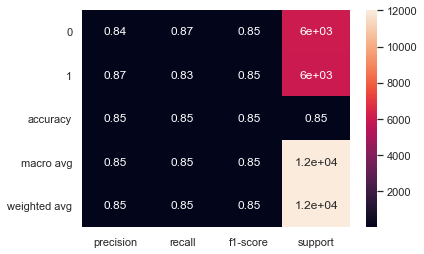

In [144]:
clsf_repo = classification_report(y_test,grbc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [145]:
from sklearn.metrics import roc_auc_score

In [146]:
print("roc auc score::",roc_auc_score(y_test, grbc_pred))

roc auc score:: 0.8509263938713569


In [147]:
from sklearn.metrics import roc_curve

In [148]:
fpr1, tpr1, thresh1 = roc_curve(y_test, grbc_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, predicted_dtc, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, predicted_rfc, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, predicted_knn, pos_label=1)

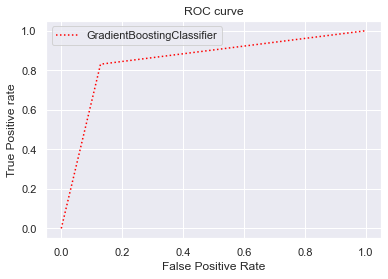

In [152]:
#plotting ROC CURVE

plt.plot(fpr1, tpr1, linestyle=':',color='red', label='GradientBoostingClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [153]:
import joblib

In [154]:
joblib.dump(grbc_grid.best_estimator_,'Micro_Credit_Loan_Defaulter_Prediction.obj')

['Micro_Credit_Loan_Defaulter_Prediction.obj']